In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
X = np.load("../data/X.npy")
Y = np.load("../data/Y.npy")

In [3]:
X.shape

(84212, 96, 27)

In [4]:
Y.shape

(84212,)

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=452)

In [6]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(75790, 96, 27)
(75790,)
(8422, 96, 27)
(8422,)


In [7]:
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(1/10))
model.add(LSTM(64))
model.add(Dropout(1/10))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(Xtrain, Ytrain, epochs=20, batch_size=64, validation_split=0.2, use_multiprocessing=True)

Epoch 1/20


948/948 [==============================] - 89s 89ms/step - loss: 0.3131 - accuracy: 0.8955 - val_loss: 0.3099 - val_accuracy: 0.8958
Epoch 2/20
948/948 [==============================] - 134s 142ms/step - loss: 0.3046 - accuracy: 0.8971 - val_loss: 0.3076 - val_accuracy: 0.8958
Epoch 3/20
948/948 [==============================] - 137s 145ms/step - loss: 0.3034 - accuracy: 0.8974 - val_loss: 0.3051 - val_accuracy: 0.8956
Epoch 4/20
948/948 [==============================] - 137s 144ms/step - loss: 0.3028 - accuracy: 0.8973 - val_loss: 0.3065 - val_accuracy: 0.8956
Epoch 5/20
948/948 [==============================] - 125s 132ms/step - loss: 0.3021 - accuracy: 0.8971 - val_loss: 0.3061 - val_accuracy: 0.8956
Epoch 6/20
948/948 [==============================] - 125s 132ms/step - loss: 0.3009 - accuracy: 0.8975 - val_loss: 0.3039 - val_accuracy: 0.8956
Epoch 7/20
948/948 [==============================] - 127s 134ms/step - loss: 0.3004 - accuracy: 0.8973 - val_loss: 0.3026 -

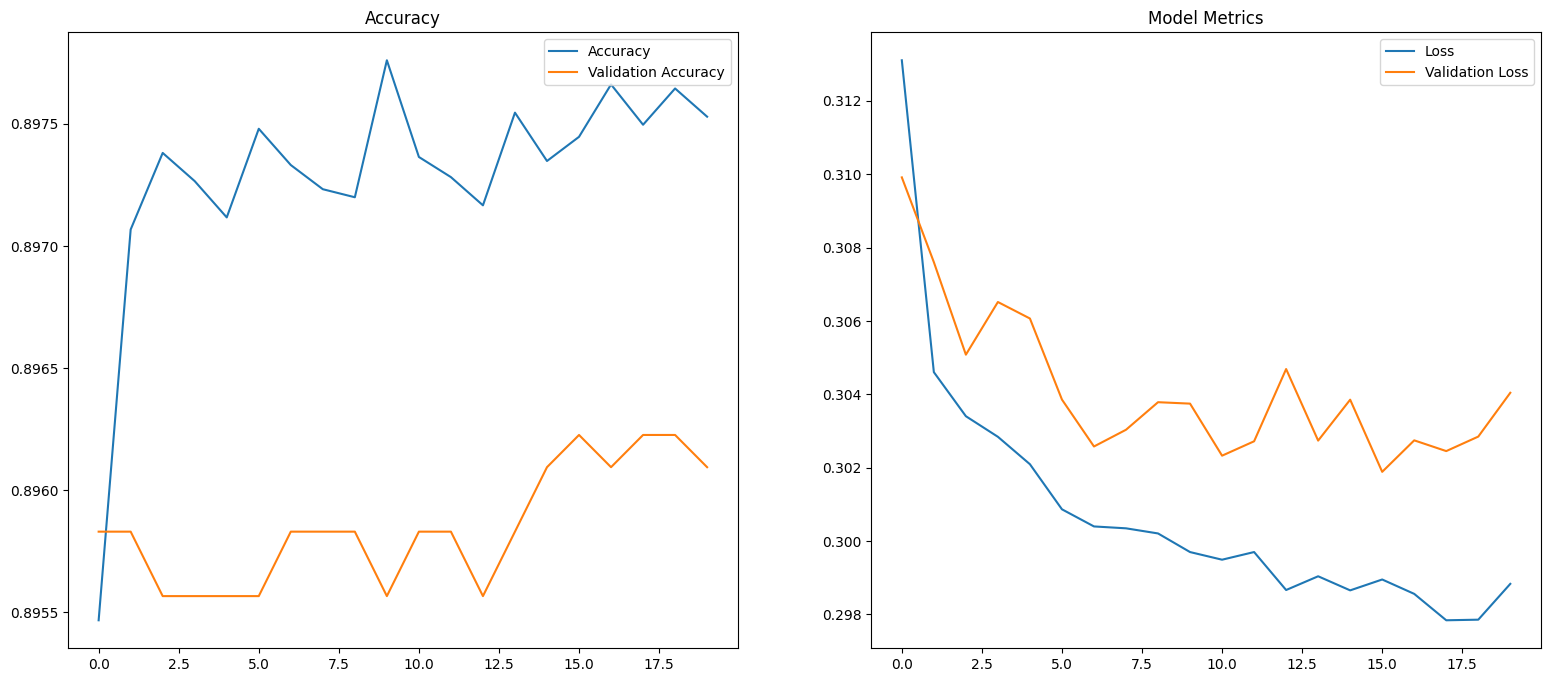

In [10]:
fig, axis = plt.subplots(1, 2, figsize=(19,8))

axis[0].plot(range(0, 20), history.history["accuracy"], label= "Accuracy")
axis[0].plot(range(0, 20), history.history["val_accuracy"], label= "Validation Accuracy")
axis[0].set_title("Accuracy")
axis[0].legend(loc='upper right')

axis[1].plot(range(0, 20), history.history["loss"], label= "Loss")
axis[1].plot(range(0, 20), history.history["val_loss"], label= "Validation Loss")
axis[1].set_title("Loss")
axis[1].legend(loc='upper right')

plt.title("Model Metrics")
plt.show()

In [11]:
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

264/264 [==============================] - 9s 34ms/step - loss: 0.3012 - accuracy: 0.8967
Test loss: 0.30119794607162476, Test accuracy: 0.8966991305351257


In [12]:
ypred = model.predict(Xtest)
ypred = ypred.reshape(ypred.shape[0])

threshold = 0.5
ypred = (ypred > threshold).astype(bool)

accuracy = accuracy_score(Ytest, ypred)
print(f"Accuracy: {accuracy}")

264/264 [==============================] - 9s 31ms/step
Accuracy: 0.8966991213488482


Confusion Matrix:


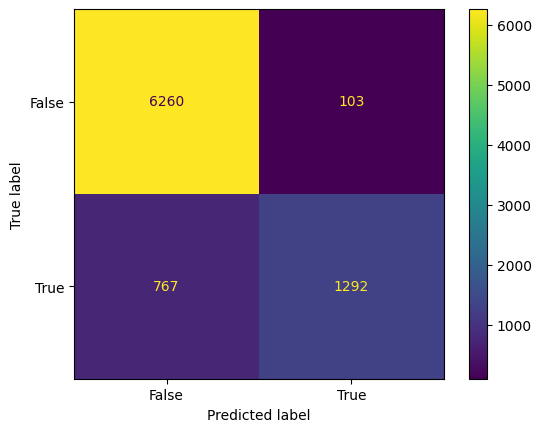

In [13]:
cm = confusion_matrix(Ytest, ypred)
print("Confusion Matrix:")
cmd = ConfusionMatrixDisplay(cm, display_labels = [False, True])
cmd.plot()

In [14]:
# Calculate TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the results
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

True Positives: 1292
True Negatives: 6260
False Positives: 103
False Negatives: 767


In [15]:
precision = precision_score(Ytest, ypred)
recall = recall_score(Ytest, ypred)
f1 = f1_score(Ytest, ypred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7481181239143022
Precision: 0.9261648745519713
Recall: 0.6274890723652259


In [16]:
def getModelSaveName():
    import os
    import ipynbname

    current_directory = os.getcwd()
    directory_name = os.path.basename(current_directory)
    notebook_name = ipynbname.name()

    return f"{directory_name}_{notebook_name}.keras"

In [17]:
# Saving the model to a file

model.save(getModelSaveName())